In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, display
from rxnmapper import RXNMapper

c:\Users\Emma\anaconda3\envs\rxnmapper\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\Emma\anaconda3\envs\rxnmapper\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# https://gist.github.com/greglandrum/61c1e751b453c623838759609dc41ef1
def draw_chemical_reaction(smiles, highlightByReactant=False, font_scale=1.5):
    rxn = rdChemReactions.ReactionFromSmarts(smiles,useSmiles=True)
    trxn = rdChemReactions.ChemicalReaction(rxn)
    # move atom maps to be annotations:
    for m in trxn.GetReactants():
        moveAtomMapsToNotes(m)
    for m in trxn.GetProducts():
        moveAtomMapsToNotes(m)
    d2d = rdMolDraw2D.MolDraw2DSVG(800,300)
    d2d.drawOptions().annotationFontScale=font_scale
    d2d.DrawReaction(trxn,highlightByReactant=highlightByReactant)

    d2d.FinishDrawing()

    return d2d.GetDrawingText()

def moveAtomMapsToNotes(m):
    for at in m.GetAtoms():
        if at.GetAtomMapNum():
            at.SetProp("atomNote",str(at.GetAtomMapNum()))

In [3]:
rxn_mapper = RXNMapper()

Some weights of the model checkpoint at C:\Users\Emma\Documents\rxnmapper\rxnmapper\models\transformers\albert_heads_8_uspto_all_1310k were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at C:\Users\Emma\Documents\rxnmapper\rxnmapper\models\transformers\albert_heads_8_uspto_all_1

In [4]:
rxns = ['CCOCC.C[Mg+].O=Cc1ccc(F)cc1Cl.[Br-]>>CC(O)c1ccc(F)cc1Cl',
       'BrCCOCCBr.CCN(C(C)C)C(C)C.CCOC(C)=O.CN(C)C=O.Cl.NCC(F)(F)CO>>OCC(F)(F)CN1CCOCC1'
       ]


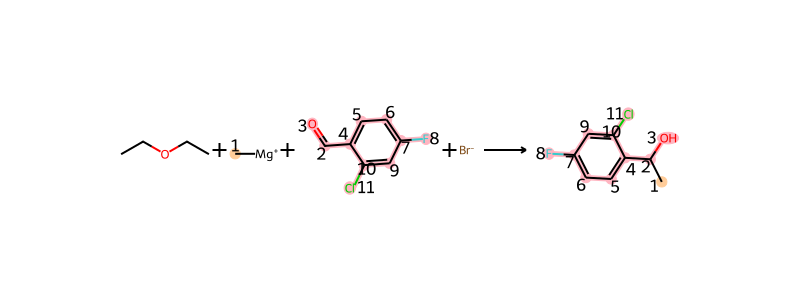

Confidence: 0.44


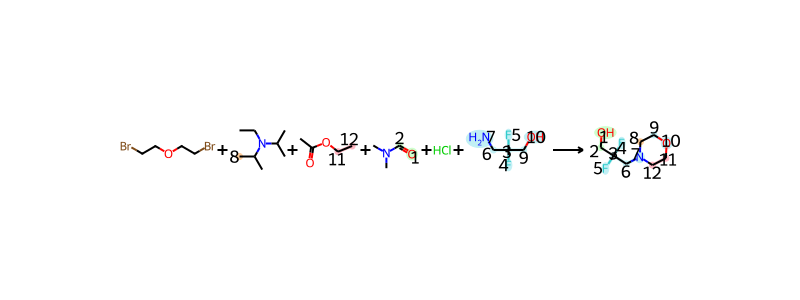

Confidence: 0.02


In [5]:
outputs = rxn_mapper.get_attention_guided_atom_maps(rxns)

for out in outputs:
    display(SVG(draw_chemical_reaction(out['mapped_rxn'],  highlightByReactant=True)))
    print(f'Confidence: {out["confidence"]:.2f}')

In [6]:
out['mapped_rxn']

'BrCCOCCBr.CCN(C(C)C)C(C)[CH3:8].CC(=O)O[CH2:11][CH3:12].CN(C)[CH:2]=[O:1].Cl.[C:3]([F:4])([F:5])([CH2:6][NH2:7])[CH2:9][OH:10]>>[OH:1][CH2:2][C:3]([F:4])([F:5])[CH2:6][N:7]1[CH2:8][CH2:9][O:10][CH2:11][CH2:12]1'

### Demonstrating Larger RXN SMILES

RXN SMILES Length: 62 & 1538
[NH2:1][CH2:13][CH2:14][CH2:15][CH2:16][CH2:17][CH:7]([CH3:2])[NH2:8].[c:5]1([CH:9]=[O:10])[cH:6][cH:21][cH:18][cH:19][cH:20]1>>[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH:7]([NH2:8])[C:9](=[O:10])[CH2:11][CH2:12][CH2:13][CH2:14][CH2:15][CH2:16][c:17]1[cH:18][cH:19][cH:20][cH:21][cH:22]1


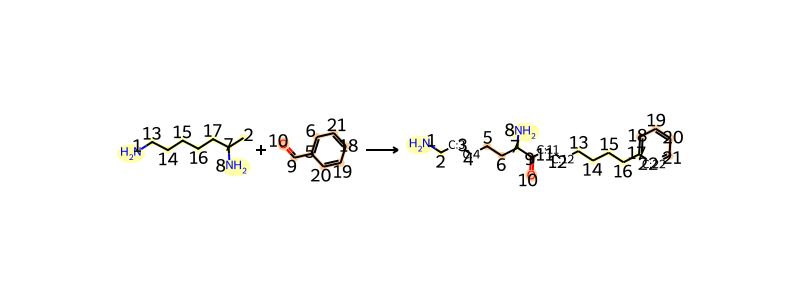

Confidence: 0.14
[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:17][CH:7]([CH3:6])[NH2:8].[CH:9](=[O:10])[c:14]1[cH:13][cH:12][cH:11][cH:21][cH:20]1.[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Cl-].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].[Na+].

Confidence: 0.02


In [10]:
demo_rxns = ['NC(C)CCCCCN.C(=O)C1=CC=CC=C1>>NC(C(=O)CCCCCCC1=CC=CC=C1)CCCCCN',
             'NC(C)CCCCCN.C(=O)C1=CC=CC=C1.[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+].[Cl-].[Na+]>>NC(C(=O)CCCCCCC1=CC=CC=C1)CCCCCN']

print("RXN SMILES Length:", len(demo_rxns[0]), "&", len(demo_rxns[1]))
outputs = rxn_mapper.get_attention_guided_atom_maps(demo_rxns)

for out in outputs:
    print(out['mapped_rxn'])
    display(SVG(draw_chemical_reaction(out['mapped_rxn'],  highlightByReactant=True)))
    print(f'Confidence: {out["confidence"]:.2f}')